In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [2]:
salary = "./ds_salaries.csv"
salary_df=pd.read_csv(salary)
salary_df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [3]:
#Counting Rows and Columns in dataset
Rows = len(salary_df.axes[0])
Columns = len(salary_df.axes[1])

print(f"Total Rows : {Rows},  Total Columns : {Columns}")

Total Rows : 3755,  Total Columns : 11


In [4]:
Summary_df = salary_df.info()
Summary_df
salary_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [5]:
#Checking for Null/Empty values in the dataset
no_entry_cell = salary_df.isnull().sum()
no_entry_cell

#No empty cell was found in the dataset. 

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [6]:
#Value counting for each columns for unique entries
value_counts = {column: salary_df[column].value_counts() for column in salary_df.columns}
value_counts

{'work_year': work_year
 2023    1785
 2022    1664
 2021     230
 2020      76
 Name: count, dtype: int64,
 'experience_level': experience_level
 SE    2516
 MI     805
 EN     320
 EX     114
 Name: count, dtype: int64,
 'employment_type': employment_type
 FT    3718
 PT      17
 CT      10
 FL      10
 Name: count, dtype: int64,
 'job_title': job_title
 Data Engineer                          1040
 Data Scientist                          840
 Data Analyst                            612
 Machine Learning Engineer               289
 Analytics Engineer                      103
                                        ... 
 Principal Machine Learning Engineer       1
 Azure Data Engineer                       1
 Manager Data Management                   1
 Marketing Data Engineer                   1
 Finance Data Analyst                      1
 Name: count, Length: 93, dtype: int64,
 'salary': salary
 100000    112
 150000    100
 120000     99
 160000     85
 130000     85
          ... 

In [7]:
#Categorical Analysis of Experience Level

Total_Exp_Count=salary_df["experience_level"].value_counts()
Total_Exp_Count

experience_level
SE    2516
MI     805
EN     320
EX     114
Name: count, dtype: int64

Text(0, 0.5, 'Count')

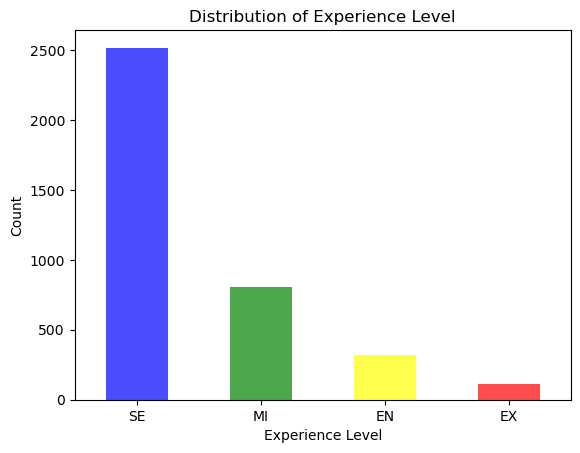

In [8]:
#Creating Plot to show the categorical analysis of Experience_level
color=["blue", "green", "yellow", "red"]
Map1 = Total_Exp_Count.plot(kind="bar", color=color, alpha=0.7)
plt.xticks(rotation="horizontal")
plt.title("Distribution of Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Count")

In [20]:
#Emp_Residence_count=salary_df["employee_residence"].value_counts()
#Emp_Residence_count
Group=salary_df.groupby("employee_residence")


ValueError: Input could not be cast to an at-least-1D NumPy array

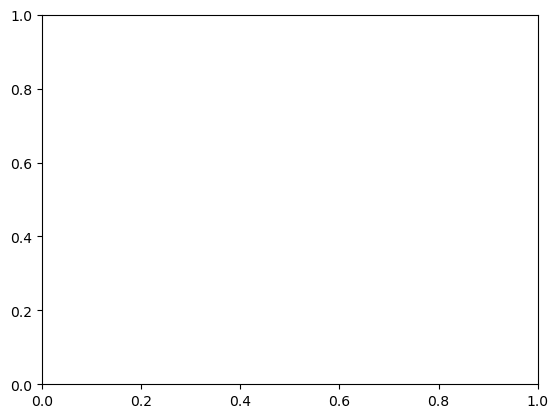

In [21]:
#Creating Plot to show the categorical analysis of Employee Residence
#plt.figure(figsize=40,10)


